# Kaggle Titanic Competition

**Author:** Dermot O'Brien
***

## Overview

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## ML Titanic Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data Overview
The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary
* `survival`: If the passenger survived or not: *0 = No, 1 = Yes*
* `pclass`:	Ticket class: *1 = 1st, 2 = 2nd, 3 = 3rd*
* `sex`: Sex	
* `Age`: Age in years	
* `sibsp`: # of siblings / spouses aboard the Titanic	
* `parch`: # of parents / children aboard the Titanic	
* `ticket`: Ticket number	
* `fare`: Passenger fare	
* `cabin`: Cabin number	
* `embarked`: Port of Embarkation: *C = Cherbourg, Q = Queenstown, S = Southampton*

## Data Understanding
In this section, we are going to explore the dataset with summary statistics and then take a deeper dive into the variables with some visualizations

### Import Data and Create Dataframes

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Import the data
test = pd.read_csv('./Data/test.csv')
train = pd.read_csv('./Data/train.csv')

# Create a column for Test Passenger ID's used for final submission csv
test_ids = test['PassengerId']

### Exploratory Data Analysis

In [3]:
# Check rows and columns
train.shape

(891, 12)

In [4]:
# See what the data looks like
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for NaN's in training set
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Check for NaN's in test set
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Missing Data - Age: 177, Cabin: 687, Embarked: 2**

**Will probably drop Cabin, large number missing**

In [8]:
# Check Ticket data
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

**Messy, will probably just drop**

In [9]:
# Check Name data
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

**Name data can be useful if we extract the titles, but that might take too long for my first iteration. Will probably drop name and do some featuring engineering in a future iteration of the model**

In [10]:
# Check the survival rate of females and males
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


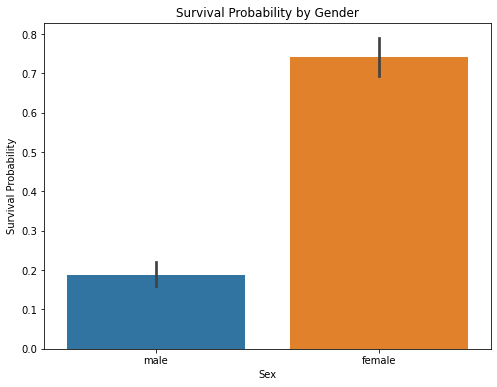

In [11]:
# Create a barplot showing the Survival Probabilities of males and females
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=train)
ax.set_ylabel('Survival Probability')
ax.set_title('Survival Probability by Gender');

**It looks like females had a much higer survival rate than males**

In [12]:
# Check the survival rates of passengers who embarked from different locations
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


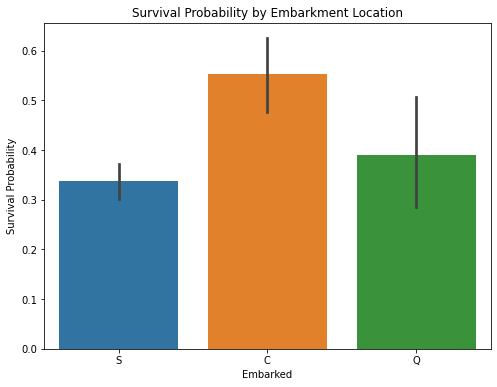

In [13]:
# # Create a barplot showing the Survival Probabilities of different embarkment locations
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Embarked', y='Survived', data=train)
ax.set_ylabel('Survival Probability')
ax.set_title('Survival Probability by Embarkment Location')
ax.set_facecolor('white');

**For some reason, passengers who embarked from "C" had a higher survival rate than "S" and "Q". Theres also a possibility that passengers who departed from "S" are in Pclass 3, due to their low survival rate. Let's test this out**

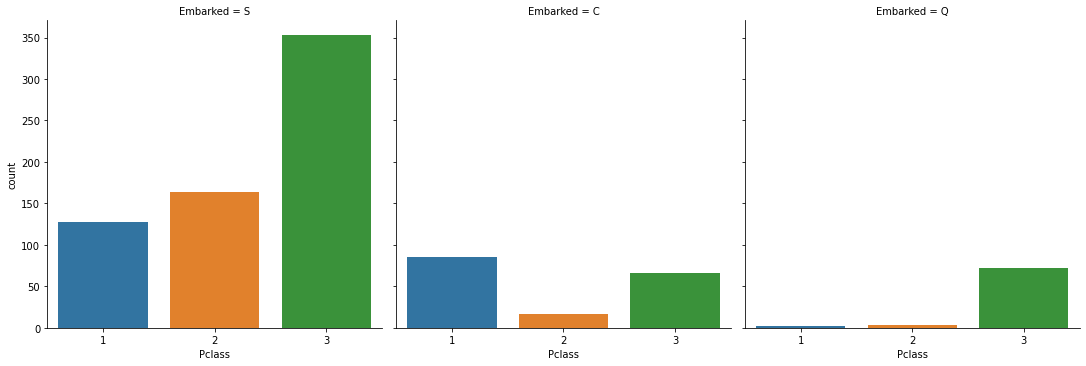

In [14]:
# Create a catplot that shows the Pclass of passengers from different embarkment locations
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')
plt.rcParams["figure.figsize"] = (10,8);

**Looks like our statement above is correct, the majority of those who Embarked from "S" are in Pclass 3, hence the low survival rate**

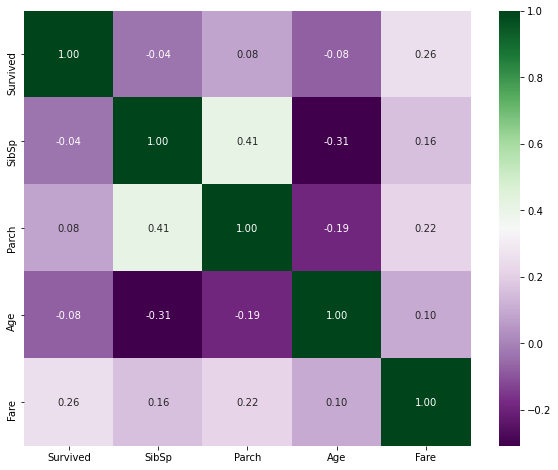

In [15]:
# Create a correlation heatmap of numeric values
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='PRGn');

**This correlation heatmap indicates that Fare is the most correlated with Survival, with a positive correlation. Those who pay more for a ticket tend to have higher probability rates**

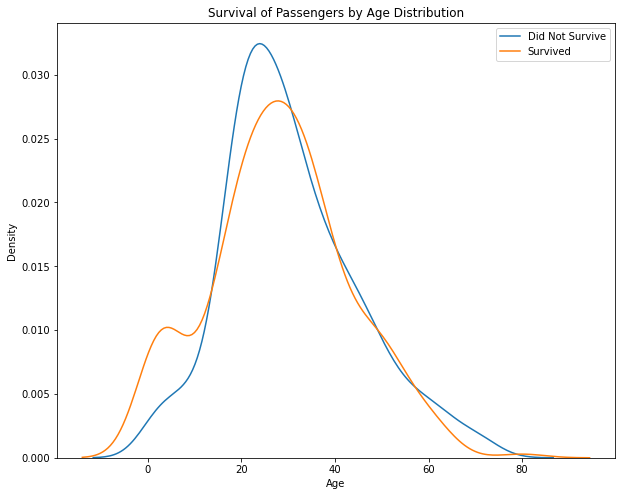

In [16]:
# Create a KDE Plot that shows the survival of passengers according to their age
sns.kdeplot(train['Age'][train['Survived'] == 0], label='Did Not Survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label='Survived')
plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel('Age')
plt.title('Survival of Passengers by Age Distribution')
plt.legend();

**As shown above, younger passengers had higher survival rates than older passengers**

__Conclusions__

Four variables seem to strongly correlate with survival rate: `Sex`, `Age`, and `Embarked`, and `Fare`. Females and young passengers seem to be saved before older men - this is both domain knowledge and backed by our visuals. It also looks like passengers who embarked from "C" had a higher survival rate, possibly due to the majority of their passegengers being in Pclass 1. Their are a few columns we should drop and a few columns we should transform. 

__Drop__

`Cabin` has 687 missing values (77% of the values), so we will drop that column. `Ticket` has nulls and seems very messy, so for the sake of time we will drop that as well. Name can be useful given if we were to sparse the titles, but that would require a ton of feature engineering. In a future iteration we can look to include `Name`, but to simplify this example we are going to drop it. `Passenger ID` is also unhelpful to predict survival rate, so that will be dropped as well

__Transform__

There are two columns that need to be tranformed into numeric values: `Sex` and `Embarked`. For Sex, we can use an encoder to make "Female" = 0 and "Male" = 1. For Embarked, we first need to change the value of Nulls as "U" or Uknown, and then encode them similar to how we encode sex. We

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

First we need to create a function that cleans the data. We want to drop `Name`, `Ticket`, `Cabin` and `Passenger ID`, and we want to address the missing values for `Fare`, `Age`, and `Embarked`. 

In [17]:
# Create a function that cleans the data set given

def clean(data):
    
    data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    
    cols = ['Fare', 'Age']
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna('U', inplace=True)
    
    return data

In [18]:
# Call the function to clean the training set
clean(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Data points have been dropped, all null numeric values have been substituted with the median value of that column, and Embarked missing data has been changed to "U" for Unknown

Now let's encode or categorical variables - `Sex` and `Embarked` - so they can be used in the model

In [20]:
# Change Sex and Embarked to numeric values using Label Encoder

encoder = LabelEncoder()

cols = ['Sex', 'Embarked']

for col in cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])
    print(encoder.classes_)
    
train.head()

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


As shown above Sex: female = 0, male = 1 & Embarked: C = 0, Q = 1, S = 2, U = 3

## Data Modeling

In [21]:
# Create models
y = train['Survived']
X = train.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

In [22]:
# Instantiate Standard Scaler and fit the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Insantiate classifier
LogReg = LogisticRegression().fit(X_train_sc, y_train)
LogReg.fit(X_train_sc, y_train)
predictions = LogReg.predict(X_test_sc)

# Calculate accuracy of model on test set
accuracy_score(y_test, predictions)

0.8071748878923767

In [23]:
# Calculate accuracy of model on training set
score = LogReg.score(X_train_sc, y_train)
score

0.8023952095808383

In [24]:
# An array of our models predictions (whether or not someobody survived)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [25]:
clean(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [26]:
submission_preds = LogReg.predict(test)

In [27]:
test_df = pd.DataFrame({'PassengerId':test_ids.values, 'Survived': submission_preds})

In [28]:
test_df.to_csv('./Submission/titanic_submission.csv', index=False)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***